# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils, optimizers
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import json
from zipfile import ZipFile
from PIL import Image


In [4]:
kaggle_credentails = json.load(open("kaggle.json"))

os.environ["KAGGLE_USERNAME"] = kaggle_credentails["username"]
os.environ["KAGGLE_KEY"] = kaggle_credentails["key"]


In [5]:

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


 99% 2.68G/2.70G [00:23<00:00, 263MB/s]
100% 2.70G/2.70G [00:24<00:00, 121MB/s]


In [6]:

with ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [7]:
!rm -rf "new plant diseases dataset(augmented)"


## Data Preprocessing

### Training Image preprocessing

In [8]:
training_set = utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [9]:
validation_set = utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [34]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(layers.Dropout(0.25))

cnn.add(layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(layers.Dropout(0.25))

cnn.add(layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(layers.Dropout(0.25))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=1500,activation='relu'))
cnn.add(layers.Dropout(0.4))

cnn.add(layers.Dense(units=38,activation='softmax'))




In [35]:
cnn.compile(optimizer=optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [36]:
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)       

In [37]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 [==============================] - 81s 35ms/step - loss: 4.0490 - accuracy: 0.1272 - val_loss: 2.6164 - val_accuracy: 0.3040
Epoch 2/10
2197/2197 [==============================] - 86s 39ms/step - loss: 1.6083 - accuracy: 0.5197 - val_loss: 1.2552 - val_accuracy: 0.6637
Epoch 3/10
2197/2197 [==============================] - 86s 39ms/step - loss: 1.0214 - accuracy: 0.6855 - val_loss: 0.9142 - val_accuracy: 0.7351
Epoch 4/10
2197/2197 [==============================] - 78s 35ms/step - loss: 0.7173 - accuracy: 0.7764 - val_loss: 0.6833 - val_accuracy: 0.7947
Epoch 5/10
2197/2197 [==============================] - 78s 35ms/step - loss: 0.5372 - accuracy: 0.8306 - val_loss: 0.4939 - val_accuracy: 0.8489
Epoch 6/10
2197/2197 [==============================] - 77s 35ms/step - loss: 0.4207 - accuracy: 0.8649 - val_loss: 0.4380 - val_accuracy: 0.8655
Epoch 7/10
2197/2197 [==============================] - 77s 35ms/step - loss: 0.3435 - accuracy: 0.8891 - val_loss: 0.2676 -

## Evaluating Model

In [58]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


2197/2197 [==============================] - 46s 21ms/step - loss: 0.1530 - accuracy: 0.9528
Training accuracy: 0.952770471572876


In [59]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


550/550 [==============================] - 12s 21ms/step - loss: 0.2190 - accuracy: 0.9277
Validation accuracy: 0.9276690483093262


### Saving Model

In [60]:
cnn.save('trained_plant_disease_model.keras')


In [61]:
training_history.history #Return Dictionary of history


{'loss': [4.048998832702637,
  1.6083011627197266,
  1.0213936567306519,
  0.7173259854316711,
  0.5371844172477722,
  0.42069002985954285,
  0.3434891998767853,
  0.2896447777748108,
  0.24591317772865295,
  0.22484943270683289],
 'accuracy': [0.12719254195690155,
  0.5196529030799866,
  0.6855394840240479,
  0.7764279246330261,
  0.8306422829627991,
  0.8649121522903442,
  0.8890959620475769,
  0.9048154354095459,
  0.918002724647522,
  0.9260260462760925],
 'val_loss': [2.6164491176605225,
  1.255160927772522,
  0.9141725897789001,
  0.6832958459854126,
  0.49392154812812805,
  0.43799468874931335,
  0.2675672769546509,
  0.24532867968082428,
  0.23985649645328522,
  0.2189546674489975],
 'val_accuracy': [0.3040063679218292,
  0.6637263894081116,
  0.735089898109436,
  0.7946733236312866,
  0.848850429058075,
  0.8655247092247009,
  0.9194172620773315,
  0.9244252443313599,
  0.9231163263320923,
  0.9276690483093262]}

In [62]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [63]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

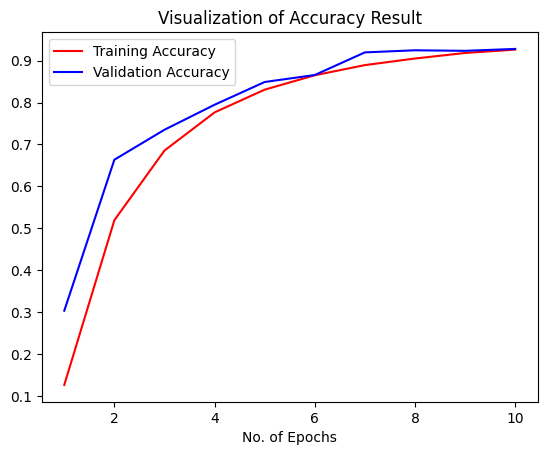

In [64]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


## Some other metrics for model evaluation

In [65]:
class_name = validation_set.class_names


In [66]:
len(class_name)


38

In [67]:
!pwd


/content


In [68]:
test_set = utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 33 files belonging to 1 classes.


In [69]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


33/33 [==============================] - 0s 2ms/step


In [70]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [71]:
Y_true


<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [72]:
predicted_categories


<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([ 2,  2,  2, 28,  0,  0, 20,  8,  8,  8, 20, 20, 20, 20, 20, 22, 22,
       29, 29, 35, 29, 29, 29, 37, 37, 37, 37, 35, 35, 35, 35, 35, 35])>

In [73]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)


In [74]:
len(Y_true)


33

In [75]:
len(predicted_categories)


33

In [76]:
# # Precision Recall Fscore
# print(classification_report(Y_true,predicted_categories,target_names=class_name))


### Confusion Matrix Visualization

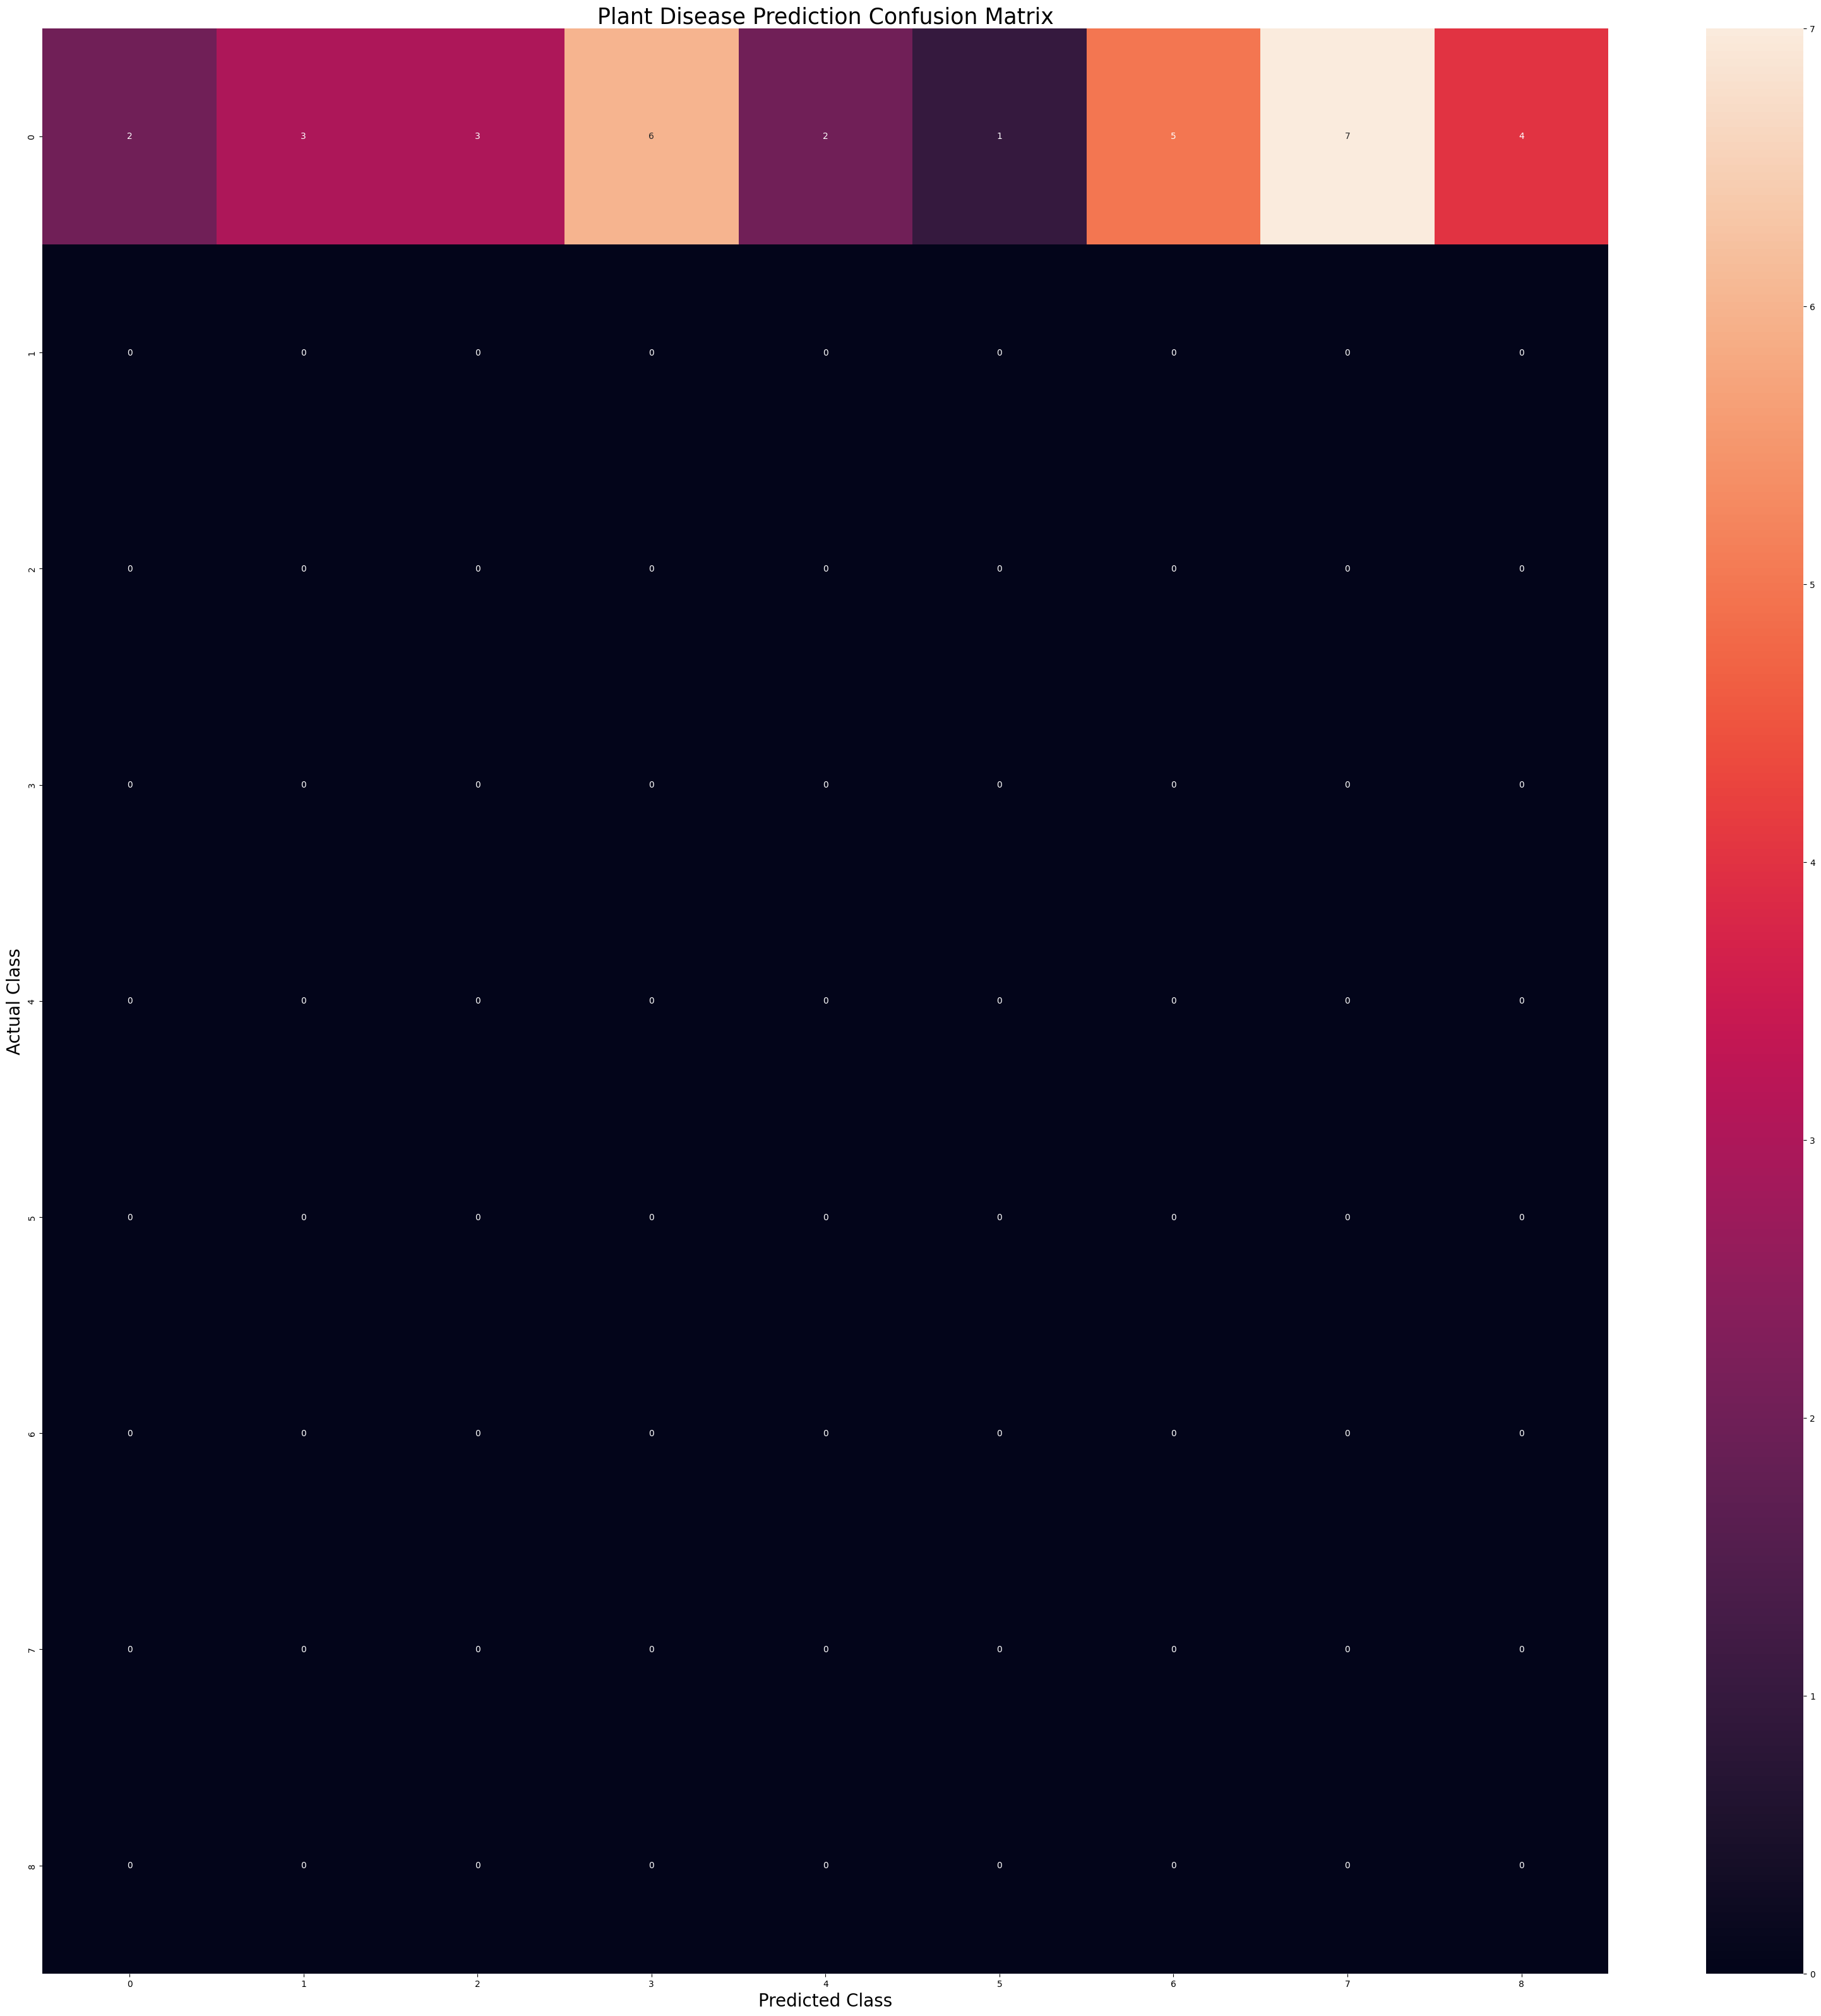

In [77]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()
